# Basic EDA

### Introduction 

This notebook contains the exploratory data analysis conducted on the data downloaded from [UCI machine learning repository](http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions)

The data is composed of 2 sections, the raw data and the prepared train/test data. I've chosen to proceed with the train/test data as my main dataset for analysis, as the feature engineering is very complex to replicate and will be difficult to complete with these time constraints. 

First, we'll start off by importing our required libraries for this analysis

In [3]:
# basic data science toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#import glob #used to get file paths within a folder
#import scipy.fft as fft #used to apply fast fourier transform

Now we can read in the data. This is a little more complicated, let me explain.

We need to create a columns dataframe to hold all of the columns within the `features2.txt` file. This is the second iteration of the original `features.txt` file, I needed to go in and modify some variables that had duplicated names.

In this cell, we're reading in the original `features.txt` file and getting the indicies of the duplicated values.

In [152]:
columns_orig = pd.read_csv('data/features.txt', header = None, names = ['Original'])
orig_columns_index = columns_orig[columns_orig.duplicated(keep=False)].index

In [157]:
print(f'We can see that we have {columns_orig[columns_orig.duplicated(keep=False)].shape[0]} duplicates to take care of')

We can see that we have 42 duplicates to take care of


Now, we can compare the modified feature names to the original file with the duplicated feature names.

In [147]:
# reading in the data
columns = pd.read_csv('data/features2.txt', header = None)

In [158]:
# combining the original feature duplicates with the modified features to compare
temp_df = pd.concat((columns_orig[columns_orig.duplicated(keep=False)],columns.loc[orig_columns_index]), axis = 1)
temp_df

,Original,0
22,tBodyAcc-ropy-1,tBodyAcc-ropy-1
23,tBodyAcc-ropy-1,tBodyAcc-ropy-2
24,tBodyAcc-ropy-1,tBodyAcc-ropy-3
62,tGravityAcc-ropy-1,tGravityAcc-ropy-1
63,tGravityAcc-ropy-1,tGravityAcc-ropy-2
64,tGravityAcc-ropy-1,tGravityAcc-ropy-3
102,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1
103,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-2
104,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-3
142,tBodyGyro-ropy-1,tBodyGyro-ropy-1


As we can see, the duplicated values in the original feature list have a set of 3 duplicates for every occurance. Using some common sense, we can infer that these were actually supposed to be the 3 different  output values from the sensors within the smartphone.

Now, we can read in the train and test data from the text files, that were separated with white spaces, and use our new modified columns dataframe to get our working data. 

In [160]:
# Reading in the X_train and X_test data
X_train = pd.read_csv('data/Train/X_train.txt', names = columns[0], sep=' ')
X_test = pd.read_csv('data/Test/X_test.txt', names = columns[0], sep=' ')

# Reading in the y_train and y_test data
y_train = pd.read_csv('data/Train/y_train.txt', sep=' ', header = None)
y_test = pd.read_csv('data/Test/y_test.txt', sep=' ', header = None)

We can also combine these train and test dataframes into one unified dataframe, just for the exploration.

In [161]:
# Combining the train data and the test data
train = pd.concat((X_train,y_train), axis = 1)
test = pd.concat((X_test, y_test), axis = 1)

---

## Basic Exploration

To begin our exploration, let's start off by taking a look at the shapes of the dataframes, just to make sure all rows and columns are aligned.

In [162]:
print(f'The X_train data set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.')
print(f'The y_train data set has {y_train.shape[0]} rows and {y_train.shape[1]} columns.')
print(f'The X_test data set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.')
print(f'The y_test data set has {y_test.shape[0]} rows and {y_test.shape[1]} columns.')

The X_train data set has 7767 rows and 561 columns.
The y_train data set has 7767 rows and 1 columns.
The X_test data set has 3162 rows and 561 columns.
The y_test data set has 3162 rows and 1 columns.


The dataframes are looking good, we can see that the train data has the same number of rows, the test data has the same number of rows, and the X and y data have the same number of columns.

We can also check for missing values! In our case, we'll skip the check for duplicates because having duplicated values for sensor data is not uncommon.

In [4]:
print(f'We have {X_train.isna().sum().sum()} missing values in the X_train data')
print(f'We have {y_train.isna().sum().sum()} missing values in the y_train data') 
print(f'We have {X_test.isna().sum().sum()} missing values in the X_test data') 
print(f'We have {y_test.isna().sum().sum()} missing values in the y_test data') 

We have 0 missing values in the X_train data
We have 0 missing values in the y_train data
We have 0 missing values in the X_test data
We have 0 missing values in the y_test data


All the dataframes have no missing values, which is a great sign for us.

Since we have such a large number of columns in our data, we should do some dimensionality reduction to visualize further. We'll be going forward with the two methods, PCA and t-SNE.

---

## PCA

To perform PCA dimensionality reduction, we'll have to fit our X_train data onto the model, then transform both the X_train and X_test, and then we can look at the explained variance ratio.

In [176]:
# instantiating PCA with 75 principal components, then fitting the model
pca = PCA(n_components=75)
pca.fit(X_train)

# transform the train data
X_train_PCA = pca.transform(X_train)

# Transform the test data
X_test_PCA = pca.transform(X_test)

Using numpy's cumsum method, we can look at the way our PCA behaves as the number of principle components increases by looking at the explained variance method.

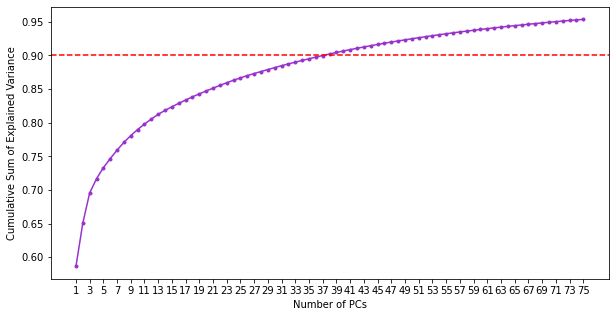

In [178]:
# Plot out the cumulative sum graph

cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (10,5))
plt.plot(range(1, cumulative_sum.shape[0] + 1), cumulative_sum, marker='.', color = "darkorchid")
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1, cumulative_sum.shape[0] + 1, 2))
plt.show()

90% explained variance means that 90% of the data is explained by this many principal components, the graph is a little hard to see where exactly this indicator is, so let's use numpy's `argmax` method to figure this out.

To see how many

In [167]:
cumulative_sum >= 0.9

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [193]:
# index of first element at least 0.9
pc_index = np.argmax(cumulative_sum >= 0.9)
print(f'The principal component that explains 90% of the data is PC: {pc_index}.')

The principal component that explains 90% of the data is PC: 37.


In [194]:
print(f'That one explained variance explains {round(cumulative_sum[37],3)*100}% of the data')

That one explained variance explains 90.2% of the data


Now we can take a look at the principal component analysis with 37 components specifically.

In [203]:
# Instantiate and fit
pca = PCA(n_components = 37)
pca.fit(X_train)

# Transform train and test
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

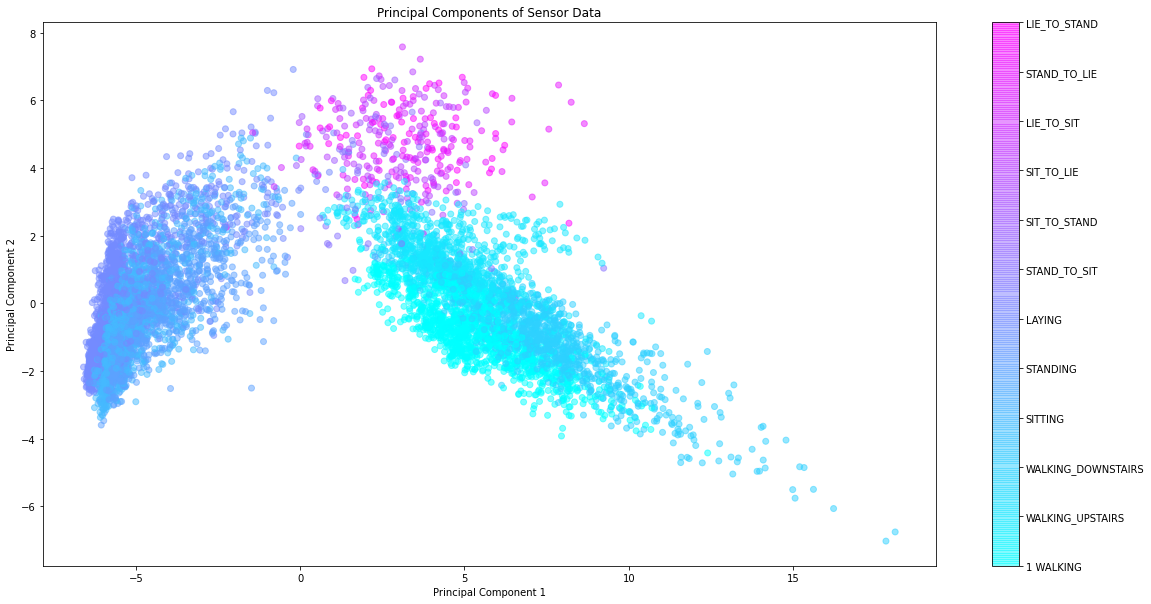

In [207]:
labels = ["1 WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS",\
          "SITTING", "STANDING", "LAYING", "STAND_TO_SIT", "SIT_TO_STAND",\
          "SIT_TO_LIE", "LIE_TO_SIT", "STAND_TO_LIE", "LIE_TO_STAND"]

# Plotting the PCA-transformed data (only the first two dimensions)
plt.figure(figsize=(20,10))
plt.scatter(X_train_PCA[:,0],X_train_PCA[:,1], c = y_train, cmap = 'cool', alpha = 0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Principal Components of Sensor Data')

# instantiate the colorbar
# readjust the number of ticks shown on the color bar
# add label names to each tick
cbar = plt.colorbar()
cbar.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])
cbar.set_ticklabels(labels)

plt.show()

From this graph that shows the first 2 principal components, we can see that there isn't clear distinction or clustering groups that could be made to identify the different human activities. 

There seems to be a lot of overlap for similar activites.
- Walking, walking upstairs and walking downstairs are the points that are bright cyan blue. All three seem to be overlapping with each other, hard to differentiate between the 3 activities
- Laying, standing and stand to sit are the blue-ish purple colors on the left. These all have strong overlaps, again, making it hard to group or identify the different labels.
- the transition moves you can see are the hot pink/ pink-ish purle points between the two groups of overlapping activities mentioned above, but even these have overlaps with each other and bleed into the other classification groups

In the end, we can say that using the PCA method on this dataset is not the way to go because there's too much overlap between the different activities, so we'll need to try a different method of dimensionality reduction to see if it'll be effective.

Let's now take a look at the t-SNE method of dimensionality reduction.

---

### t-SNE

To perform t-SNE dimensionality reduction, typically we need to scale the data first, but in our case, since all of the data is already scaled, we can skip this step. Firstly, we'll have to fit our X_train data onto the model, then transform both the X_train data, and after that we can plot to see our transformed data.

In [46]:
# tSNE with two components
# Since the data is already scaled, we can use the data directly

tSNE = TSNE(n_components=2)

X_tSNE = tSNE.fit_transform(X_train)

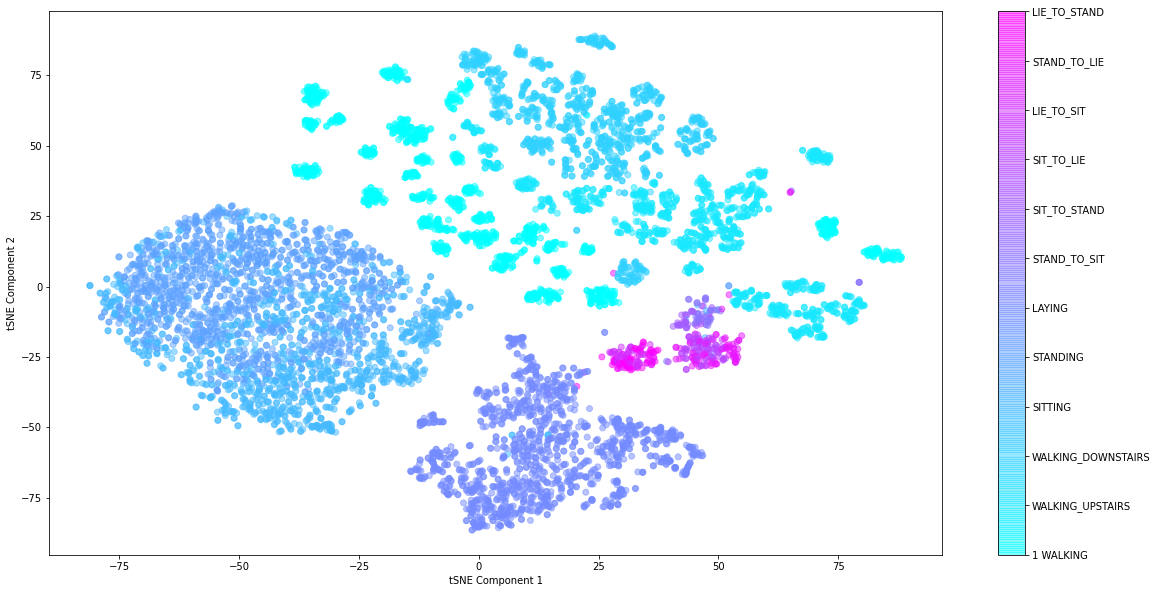

In [206]:
# Plotting the tSNE-transformed data (only the first two dimensions)

plt.figure(figsize=(20, 10))
plt.scatter(X_tSNE[:,0],X_tSNE[:,1], c = y_train, cmap='cool', alpha = 0.5)

plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

# instantiate the colorbar
# readjust the number of ticks shown on the color bar
# add label names to each tick
cbar = plt.colorbar()
cbar.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])
cbar.set_ticklabels(labels)

plt.show()

### More Feature Exploration

In [66]:
activity_avg = train.groupby(by=0).mean()

In [91]:
activity_avg.head(12)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,,,,,,,,,,,,,,,,,,,,,
1,0.038610,-0.003473,-0.019730,-0.312709,-0.320093,-0.454140,-0.350246,-0.371068,-0.545413,-0.025313,...,0.165187,-0.085937,-0.406725,0.021051,-0.011916,0.003175,-0.015134,-0.757605,0.220433,0.073663
2,0.032830,-0.012250,-0.027092,-0.221135,-0.306264,-0.377432,-0.279852,-0.346249,-0.474664,0.062147,...,0.140486,-0.376937,-0.684111,0.029824,0.005581,-0.156998,0.044775,-0.634021,0.282345,0.134093
3,0.043449,-0.002116,-0.017834,0.139695,-0.251327,-0.397684,0.073148,-0.319632,-0.509891,0.482521,...,0.148635,-0.338214,-0.669795,-0.039255,-0.021045,0.185489,-0.071303,-0.778699,0.199156,0.065241
4,0.037438,0.001972,-0.018468,-0.981788,-0.950845,-0.951542,-0.983671,-0.952466,-0.957825,-0.784626,...,0.213103,-0.394127,-0.685107,0.009957,0.009735,0.015487,-0.033197,-0.691866,-0.003685,-0.089508
5,0.040014,-0.001464,-0.019198,-0.983653,-0.951550,-0.954055,-0.986596,-0.955258,-0.960511,-0.780490,...,0.127356,-0.353542,-0.654636,0.006765,0.014861,0.006006,0.011587,-0.773528,0.208742,0.048434
6,0.035454,-0.004054,-0.018190,-0.955347,-0.953109,-0.954817,-0.957930,-0.955529,-0.961109,-0.769977,...,0.209506,-0.361442,-0.662857,0.016553,0.023222,0.010329,0.019372,0.513885,-0.442293,-0.435213
7,-0.016196,0.067546,0.035108,-0.609380,-0.062844,-0.307822,-0.667416,-0.060561,-0.376101,-0.251015,...,-0.040014,-0.253531,-0.595771,0.148327,0.080787,-0.077658,-0.113115,-0.709045,0.252200,0.058463
8,0.061927,-0.419442,-0.270599,-0.614667,-0.036443,-0.270745,-0.662430,-0.006581,-0.333581,-0.314233,...,-0.122265,-0.252300,-0.601157,0.109911,-0.174727,0.063067,-0.147760,-0.683412,0.016335,-0.080570
9,-0.363518,0.385396,0.224864,-0.448841,-0.089657,-0.205616,-0.472485,-0.075445,-0.289162,-0.647737,...,0.030498,-0.236825,-0.565436,0.179177,0.331519,0.260167,-0.177570,-0.574240,-0.116525,-0.062857


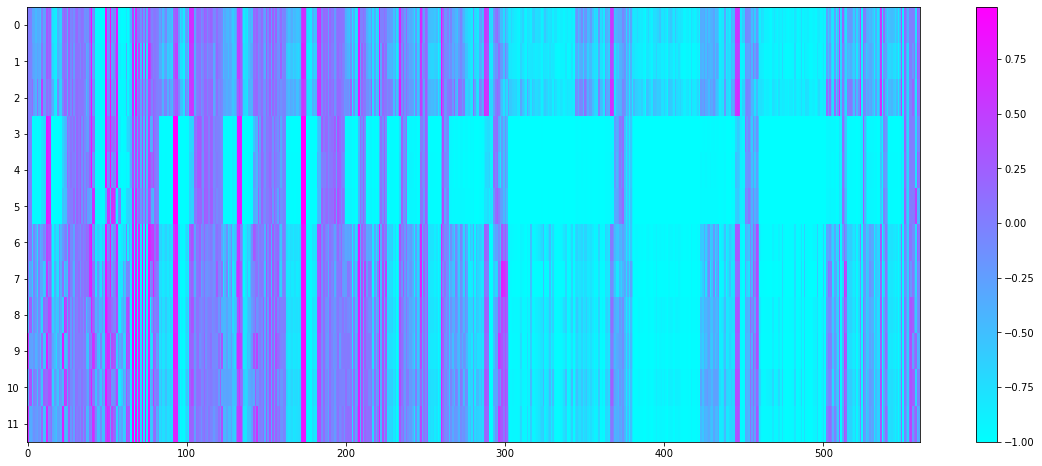

In [96]:
plt.figure(figsize = (20,8))

plt.imshow(activity_avg,cmap="cool", interpolation ='nearest', aspect = 'auto')

plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11])

plt.colorbar()
plt.show()